**UAS - STATISTIK KOMPUTASI**

---

**NAMA : M. MUIZZUDDIN RIFQI (15)**

**KELAS : TI-2E**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
from scipy.stats import kstest, norm
import statsmodels.api as sm

In [ ]:
path = "Walmart.csv"

df = pd.read_csv(path)
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


# Soal 1A

Berdasarkan data yang diberikan kolom mana yang dapat digunakan untuk permodelan regresi dan tidak?

# Soal 1B

Carilah nilai-nilai statistik deskriptif 'mean', 'median', simpangan baku, varians pada kolom yang dapat digunakan untuk regresi sesuai dengan nomor 1a hanya UNTUK STORE 4

In [ ]:
data_store_4 = df[df['Store'] == 4]

mean = data_store_4[['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].mean()
median = data_store_4[['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].median()
std = data_store_4[['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].std()
variance = data_store_4[['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].var()

print("Mean:")
print(mean)
print("\nMedian:")
print(median)
print("\nStandard Deviation:")
print(std)
print("\nVariance:")
print(variance)

Mean:
Weekly_Sales    2.094713e+06
Holiday_Flag    6.993007e-02
Temperature     6.225336e+01
Fuel_Price      3.216972e+00
CPI             1.286797e+02
Unemployment    5.964692e+00
dtype: float64

Median:
Weekly_Sales    2.073951e+06
Holiday_Flag    0.000000e+00
Temperature     6.422000e+01
Fuel_Price      3.290000e+00
CPI             1.290757e+02
Unemployment    5.946000e+00
dtype: float64

Standard Deviation:
Weekly_Sales    266201.442297
Holiday_Flag         0.255926
Temperature         16.180023
Fuel_Price           0.416967
CPI                  1.858300
Unemployment         1.421267
dtype: float64

Variance:
Weekly_Sales    7.086321e+10
Holiday_Flag    6.549788e-02
Temperature     2.617931e+02
Fuel_Price      1.738612e-01
CPI             3.453279e+00
Unemployment    2.020001e+00
dtype: float64


# Soal 1C

Tentukan nilai Q1, Q2, Q3, dan IQR untuk 'Fuel_Price', 'CPI', dan 'Unemployment' HANYA UNTUK STORE 4

In [ ]:
# Filter data hanya untuk Store 4
data_store_4 = df[df['Store'] == 4]

# Menghitung quartile dan IQR
q1 = data_store_4['Fuel_Price'].quantile(0.25)
q2 = data_store_4['Fuel_Price'].quantile(0.5)
q3 = data_store_4['Fuel_Price'].quantile(0.75)
iqr = q3 - q1

print("Fuel_Price - Store 4:")
print("Q1:", q1)
print("Q2 (Median):", q2)
print("Q3:", q3)
print("IQR:", iqr)

q1 = data_store_4['CPI'].quantile(0.25)
q2 = data_store_4['CPI'].quantile(0.5)
q3 = data_store_4['CPI'].quantile(0.75)
iqr = q3 - q1

print("\nCPI - Store 4:")
print("Q1:", q1)
print("Q2 (Median):", q2)
print("Q3:", q3)
print("IQR:", iqr)

q1 = data_store_4['Unemployment'].quantile(0.25)
q2 = data_store_4['Unemployment'].quantile(0.5)
q3 = data_store_4['Unemployment'].quantile(0.75)
iqr = q3 - q1

print("\nUnemployment - Store 4:")
print("Q1:", q1)
print("Q2:", q2)
print("Q3:", q3)
print("IQR:", iqr)

Fuel_Price - Store 4:
Q1: 2.7645
Q2 (Median): 3.29
Q3: 3.5865
IQR: 0.8220000000000001

CPI - Store 4:
Q1: 126.59009445
Q2 (Median): 129.0756774
Q3: 130.5024138
IQR: 3.912319350000004

Unemployment - Store 4:
Q1: 4.607
Q2: 5.946
Q3: 7.127
IQR: 2.5199999999999996


# Soal 1D

In [ ]:
# varianss holiday week (Holiday_Flag == 1)
variance_holiday = df[df['Holiday_Flag'] == 1]['Weekly_Sales'].var()

# varians non-holiday week (Holiday_Flag == 0)
variance_non_holiday = df[df['Holiday_Flag'] == 0]['Weekly_Sales'].var()

print("Varians - Holiday Week (Holiday_Flag = 1):", variance_holiday)
print("Varians - Non-Holiday Week (Holiday_Flag = 0):", variance_non_holiday)


Variansi - Holiday Week (Holiday_Flag = 1): 393988373714.19293
Variansi - Non-Holiday Week (Holiday_Flag = 0): 312433415424.3812


# Soal 1E

Apakah rata-rata weekly sales di setiap toko (store) sama

In [ ]:
# Mean weekly sales per toko (store)
mean_sales_per_store = df.groupby('Store')['Weekly_Sales'].mean()

# Mengecek apakah Mean weekly sales di setiap toko sama
are_means_equal = mean_sales_per_store.nunique() == 1

print(mean_sales_per_store)
print("Apakah rata-rata weekly sales di setiap toko sama?")
print(are_means_equal)

Store
1     1.555264e+06
2     1.925751e+06
3     4.027044e+05
4     2.094713e+06
5     3.180118e+05
6     1.564728e+06
7     5.706173e+05
8     9.087495e+05
9     5.439806e+05
10    1.899425e+06
11    1.356383e+06
12    1.009002e+06
13    2.003620e+06
14    2.020978e+06
15    6.233125e+05
16    5.192477e+05
17    8.935814e+05
18    1.084718e+06
19    1.444999e+06
20    2.107677e+06
21    7.560691e+05
22    1.028501e+06
23    1.389864e+06
24    1.356755e+06
25    7.067215e+05
26    1.002912e+06
27    1.775216e+06
28    1.323522e+06
29    5.394514e+05
30    4.385796e+05
31    1.395901e+06
32    1.166568e+06
33    2.598617e+05
34    9.667816e+05
35    9.197250e+05
36    3.735120e+05
37    5.189003e+05
38    3.857317e+05
39    1.450668e+06
40    9.641280e+05
41    1.268125e+06
42    5.564039e+05
43    6.333247e+05
44    3.027489e+05
45    7.859814e+05
Name: Weekly_Sales, dtype: float64
Apakah rata-rata weekly sales di setiap toko sama?
False


# Soal 1F

Dari setiap toko (store), CPI mana yang lebih tinggi?

In [ ]:
# Mengelompokkan data berdasarkan toko dan mencari nilai maksimum CPI
max_cpi_per_store = df.groupby('Store')['CPI'].max()

# toko dengan CPI tertinggi
store_with_highest_cpi = max_cpi_per_store.idxmax()
highest_cpi = max_cpi_per_store.max()

print("Toko dengan CPI tertinggi")
print("Store:", store_with_highest_cpi)
print("CPI tertinggi:", highest_cpi)

Toko dengan CPI tertinggi
Store: 9
CPI tertinggi: 227.2328068


# Soal 1G

CPI mana yang lebih tinggi, holiday week atau non holiday week?

In [ ]:
# Mean CPI holiday week
mean_cpi_holiday = df[df['Holiday_Flag'] == 1]['CPI'].mean()

# Mean CPI non-holiday week
mean_cpi_non_holiday = df[df['Holiday_Flag'] == 0]['CPI'].mean()

# Membandingkan rata-rata CPI antara holiday week dan non-holiday week
if mean_cpi_holiday > mean_cpi_non_holiday:
    result = "Holiday week memiliki CPI yang lebih tinggi."
elif mean_cpi_holiday < mean_cpi_non_holiday:
    result = "Non-holiday week memiliki CPI yang lebih tinggi."
else:
    result = "Rata-rata CPI pada holiday week dan non-holiday week sama."

print("CPI Holiday Week : ", mean_cpi_holiday)
print("CPI Non-Holiday Week : ", mean_cpi_non_holiday)
print("Perbandingan CPI antara holiday week dan non-holiday week:")
print(result)

CPI Holiday Week :  171.26809160977777
CPI Non-Holiday Week :  171.60172484419382
Perbandingan CPI antara holiday week dan non-holiday week:
Non-holiday week memiliki CPI yang lebih tinggi.


# Soal 2A

Lakukan uji normalitas pada 'Weekly_Sales' dan 'Fuel_Price' menggunakan uji KS dengan tingkat a = 0.05. Apakah kedua nilai tersebut bedasar dan distribusi normal? Kemukakan jawaban anda dengan bukti hasil analisis

In [ ]:
# from 'Weekly_Sales' dan 'Fuel_Price'
weekly_sales = df['Weekly_Sales']
fuel_price = df['Fuel_Price']

# uji normalitas dengan uji KS pada 'Weekly_Sales'
statistic_sales, p_value_sales = kstest(weekly_sales, 'norm')
is_sales_normal = p_value_sales > 0.05

# uji normalitas dengan uji KS pada 'Fuel_Price'
statistic_fuel, p_value_fuel = kstest(fuel_price, 'norm')
is_fuel_normal = p_value_fuel > 0.05

print("Hasil Uji Normalitas 'Weekly_Sales':")
print("Statistik:", statistic_sales)
print("p-value:", p_value_sales)
print("Distribusi Normal:", is_sales_normal)

print("\nHasil Uji Normalitas 'Fuel_Price':")
print("Statistik:", statistic_fuel)
print("p-value:", p_value_fuel)
print("Distribusi Normal:", is_fuel_normal)

Hasil Uji Normalitas 'Weekly_Sales':
Statistik: 1.0
p-value: 0.0
Distribusi Normal: False

Hasil Uji Normalitas 'Fuel_Price':
Statistik: 0.9938591330984947
p-value: 0.0
Distribusi Normal: False


# Soal 2B

Berdasakan soal 1a, tentukan variabel independen dan variabel dependennya

-	Variabel Independen	 : Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment
-	Variabel Dependennya	: Weekly_Sales

'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', dan 'Unemployment' adalah variabel independen yang dapat digunakan untuk mempengaruhi atau menjelaskan variabel dependen, yaitu 'Weekly_Sales'



# Soal 3A

Lakukan uji kolerasi antara masing masing variabel independen dengan variabel dependen. Berapa nilai korelasinya? (Contoh pasangan korelasi: Weekly_Sales-CPI)

In [ ]:
# Menghitung koefisien korelasi antara variabel independen dan variabel dependen
correlation_sales_cpi = df['Weekly_Sales'].corr(df['CPI'])
correlation_sales_holiday = df['Weekly_Sales'].corr(df['Holiday_Flag'])
correlation_sales_temperature = df['Weekly_Sales'].corr(df['Temperature'])
correlation_sales_fuel = df['Weekly_Sales'].corr(df['Fuel_Price'])
correlation_sales_unemployment = df['Weekly_Sales'].corr(df['Unemployment'])

# Menampilkan nilai koefisien korelasi
print("Korelasi antara Weekly_Sales dan CPI:", correlation_sales_cpi)
print("Korelasi antara Weekly_Sales dan Holiday_Flag:", correlation_sales_holiday)
print("Korelasi antara Weekly_Sales dan Temperature:", correlation_sales_temperature)
print("Korelasi antara Weekly_Sales dan Fuel_Price:", correlation_sales_fuel)
print("Korelasi antara Weekly_Sales dan Unemployment:", correlation_sales_unemployment)

Korelasi antara Weekly_Sales dan CPI: -0.07263416204017631
Korelasi antara Weekly_Sales dan Holiday_Flag: 0.03689096801041455
Korelasi antara Weekly_Sales dan Temperature: -0.06381001317946956
Korelasi antara Weekly_Sales dan Fuel_Price: 0.009463786314475114
Korelasi antara Weekly_Sales dan Unemployment: -0.10617608965795429


# Soal 3B

Apakah ada pasangan variabel independen dan dependen yang memiliki korelasi negatif? jika ya, sebutkan pasangan variabelnya

In [ ]:
# Menghitung koefisien korelasi antara variabel independen dan variabel dependen
correlation_matrix = df[['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()

# Menemukan pasangan variabel independen dan dependen dengan korelasi negatif
negative_correlations = correlation_matrix[correlation_matrix['Weekly_Sales'] < 0]['Weekly_Sales']

# Menampilkan pasangan variabel independen dan dependen dengan korelasi negatif
if not negative_correlations.empty:
    print("Pasangan variabel independen dan dependen dengan korelasi negatif:")
    for column, correlation in negative_correlations.iteritems():
        print(f"{column} - Weekly_Sales: {correlation}")
else:
    print("Tidak ada pasangan variabel independen dan dependen dengan korelasi negatif.")

Pasangan variabel independen dan dependen dengan korelasi negatif:
Temperature - Weekly_Sales: -0.06381001317946852
CPI - Weekly_Sales: -0.07263416204017413
Unemployment - Weekly_Sales: -0.10617608965795235


<ipython-input-32-61c53f64face>:10: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, correlation in negative_correlations.iteritems():


# Soal 4

Buatlah model regresi berdasarkan variabel independen 'Fuel_Price'. Nyatakan Model anda dalam bentuk y^=a+bx

Model Regresi:
y^ = 1007884.9200801762 + 11635.76428297975x


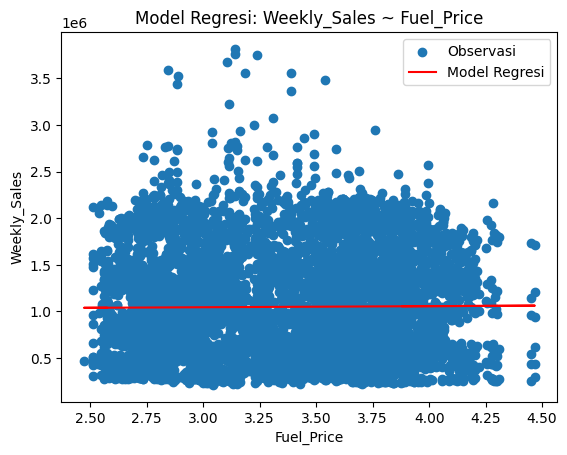

In [ ]:
# Menentukan variabel dependen (y) dan variabel independen (x)
y = df['Weekly_Sales']
x = df['Fuel_Price']

# Menambahkan kolom konstanta untuk model regresi
x = sm.add_constant(x)

# Membangun model regresi
model = sm.OLS(y, x)

# Melakukan fitting model
results = model.fit()

# Menampilkan hasil model
a = results.params[0]  # Intercept (a)
b = results.params[1]  # Koefisien variabel independen (b)

# Menyatakan model dalam bentuk y^ = a + bx
model_equation = f"y^ = {a} + {b}x"

print("Model Regresi:")
print(model_equation)

# Membuat plot data dan model regresi
plt.scatter(x['Fuel_Price'], y, label='Observasi')
plt.plot(x['Fuel_Price'], results.fittedvalues, color='red', label='Model Regresi')
plt.xlabel('Fuel_Price')
plt.ylabel('Weekly_Sales')
plt.legend()
plt.title('Model Regresi: Weekly_Sales ~ Fuel_Price')
plt.show()